In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import requests
import io
url = r"https://github.com/IBM-EPBL/IBM-Project-51631-1660981089/blob/main/Data%20Collection/DataSet1986-2018.xlsx?raw=true"
download = requests.get(url).content
data = pd.read_excel(url,index_col=0,parse_dates=[0])
print(data.head())

            Closing Value
Date                     
1986-01-02          25.56
1986-01-03          26.00
1986-01-06          26.53
1986-01-07          25.85
1986-01-08          25.87


In [3]:
data.isnull().any()
data.isnull().sum()
data.dropna(axis = 0, inplace = True)
data.isnull().sum()
data_oil = data.reset_index()['Closing Value']
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler (feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

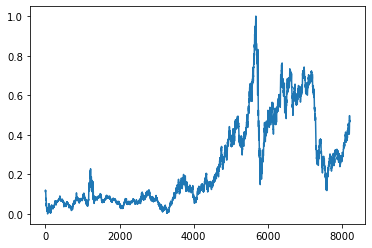

In [5]:
plt.plot(data_oil)

In [6]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data, test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]
training_size,test_size
train_data.shape

(5340, 1)

In [7]:
def create_dataset(dataset, time_step=1): 
  dataX, dataY = [], [] 
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)
  
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)

(5329, 10)
(5329,)
(2865, 10)
(2865,)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [9]:
model = Sequential()

In [10]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

In [11]:
model.add(Dense (1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss= 'mean_squared_error', optimizer='adam')

In [13]:
model.fit(X_train,y_train,validation_data=(X_test,ytest), epochs=50,batch_size=64, verbose = 1)

Epoch 1/50
84/84 [==============================] - 7s 34ms/step - loss: 0.0021 - val_loss: 9.0857e-04
Epoch 2/50
84/84 [==============================] - 2s 24ms/step - loss: 1.2624e-04 - val_loss: 8.8293e-04
Epoch 3/50
84/84 [==============================] - 2s 21ms/step - loss: 1.2536e-04 - val_loss: 7.8497e-04
Epoch 4/50
84/84 [==============================] - 2s 19ms/step - loss: 1.2326e-04 - val_loss: 0.0010
Epoch 5/50
84/84 [==============================] - 2s 19ms/step - loss: 1.2401e-04 - val_loss: 8.0973e-04
Epoch 6/50
84/84 [==============================] - 2s 22ms/step - loss: 1.2322e-04 - val_loss: 8.0482e-04
Epoch 7/50
84/84 [==============================] - 2s 23ms/step - loss: 1.3275e-04 - val_loss: 9.5562e-04
Epoch 8/50
84/84 [==============================] - 2s 24ms/step - loss: 1.2850e-04 - val_loss: 7.5660e-04
Epoch 9/50
84/84 [==============================] - 2s 24ms/step - loss: 1.1688e-04 - val_loss: 0.0010
Epoch 10/50
84/84 [==============================